In [7]:
from dtw import *
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import sounddevice as sd
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io;
import os
import glob
import webrtcvad
import statistics

import collections
import contextlib
import sys
import wave

##https://pyts.readthedocs.io/en/stable/auto_examples/metrics/plot_dtw.html
from pyts.datasets import load_gunpoint; import math
from pyts.metrics import dtw, itakura_parallelogram, sakoe_chiba_band
from pyts.metrics.dtw import (cost_matrix, accumulated_cost_matrix, _return_path, _blurred_path_region)
import itertools; import statistics

vad = webrtcvad.Vad()

import contextlib


capstone_dir = "/Users/ninismacbook/other docs/Y4S1/capstone"

query_sample = []
ref_sample = []
blocksize = 18000

def make_samples(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2):
    
    file1_path = capstone_dir + "/downsampled/" + file1
    file2_path = capstone_dir + "/downsampled/" + file2

    samplerate, query = wavfile.read(file1_path)
    samplerate, ref = wavfile.read(file2_path)

    query_sample = query[int(samplerate*seg1_1): int(samplerate*seg1_2)]
    ref_sample = ref[int(samplerate*seg2_1): int(samplerate*seg2_2)]
    
    return query_sample, ref_sample, samplerate

def play_samples():
    sd.play(query_sample, samplerate = samplerate, blocksize=blocksize, blocking=True)
    sd.play(ref_sample, samplerate = samplerate, blocksize=blocksize, blocking=True);
    
def plot_alignment(alignment):
    alignment.plot(type="threeway"); 
    print('DTW distance: ', alignment.distance);
    print('How much stretching: ', how_much_stretch(alignment))
    
def how_much_stretch(alignment):
    align_len = len(alignment.index1)
    xs = alignment.index1
    ys = alignment.index2
    abs_term = 0
    
    for i in range(align_len):
        if i == 0:
            pass
        if i == align_len-1:
            pass
        else:
            # alignment.M = len of Y axis, alignment.N = len of X axis
            abs_term = abs_term + np.abs((ys[i] - ys[i-1])/(xs[i]-xs[i-1]) - (alignment.N + 1)/(alignment.M+1))
        
        return (1/align_len)*abs_term

# Voice activity detection in python (webrtcsav)

In [2]:
def read_wave(path):
    """Reads a .wav file.
    Takes the path, and returns (PCM audio data, sample rate).
    """
    with contextlib.closing(wave.open(path, 'rb')) as wf:
        num_channels = wf.getnchannels()
        assert num_channels == 1
        sample_width = wf.getsampwidth()
        assert sample_width == 2
        sample_rate = wf.getframerate()
        assert sample_rate in (8000, 16000, 32000, 48000)
        pcm_data = wf.readframes(wf.getnframes())
        return pcm_data, sample_rate
        

# Convert all records into true or false based on whether there is voice activity or not
def speak_pause_rate(audio_path, frame_len):
    
    speech = []
    vad.set_mode(1)

    # 1 pair of \x00\x00 corresponds to 1 frame
    data, samplerate = read_wave(capstone_dir + audio_path)

    speech_segments = [data[i:i+frame_len] for i in range(0, len(data)-frame_len, frame_len)]
    
    print(speech_segments[0])
    for i in speech_segments:
        speech.append(vad.is_speech(i, sample_rate = samplerate))
    print(speech[0])
    
    segment0 = b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
#     print('equal ', segment0 == speech[0])
    
    pause = [not elem for elem in speech]
    return (speech.count(True)/len(speech)), (pause.count(True)/len(speech))

# Does not count the first (before speaker starts speaking) and last pause (after speaker finishes speaking)
def number_of_pauses(audio_path, frame_len):
    speech = []
    
    vad.set_mode(1)
    data, samplerate = read_wave(capstone_dir + '/downsampled/01.wav')
    speech_segments = [data[i:i+frame_len] for i in range(0, len(data)-frame_len, frame_len)]
    
    for i in speech_segments:
        speech.append(vad.is_speech(i, sample_rate = samplerate))
    
#     print(speech)
    for i in range(len(speech)):
        # Find the first True i.e. find the time when speaker starts speaking 
        if(speech[i]==True):
            return('Index of the speech segment when speaker starts speaking', i, speech[i])

In [5]:
print(speak_pause_rate('/downsampled/01.wav', frame_len = 160))        
print(number_of_pauses('/downsampled/01.wav', frame_len = 160))

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
False
(0.8663543675943787, 0.13364563240562138)
('Index of the speech segment when speaker starts speaking', 0, True)


In [6]:
# Run the VAD on 10 ms of silence. The result should be False.
vad.set_mode(1)
sample_rate = 8000
frame_duration = 10  # ms
frame = b'\x00\x00' * int(sample_rate * frame_duration / 1000)
print(frame)
print('Contains speech: ' , vad.is_speech(frame, sample_rate))


b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
Contains speech:  True


# Test alignment

In [12]:

def deviation(rho, theta):
    dev = 0
    if rho >= theta and rho <= math.pi/2:
        dev = (rho-theta)/(math.pi/2-theta)
    else:
        dev = (theta - rho)/theta
    return dev


def stretch(path, speech_1, speech_2):
    len_x = max(path[0])
    len_y = max(path[1])
    xs = path[0]
    ys = path[1]
    theta = math.atan(len_y/len_x)    
    numerator = 0
    denominator = 0
    
    stretch_speech = 0
    stretch_pause = 0
    stretch_others = 0
    overall_stretch = 0

    # For 1 point in the warping path x, y
    # xs[i] = index of the point in the original query that dtw uses to align x
    # ys[i] = index of the point in the original reference query that dtw uses to align y                  
    
    # length of path = len(path[0]) = len(path[1])
    for i in range(len(path[0])-1):
        if xs[i+1]-xs[i] == 0:
            rho_i = math.pi/2
        else:
            rho_i = math.atan((ys[i+1]-ys[i]) / (xs[i+1]-xs[i]))

        dev_rho_i = deviation(rho_i, theta)
        numerator = dev_rho_i*math.sqrt((xs[i+1]-xs[i])**2 + (ys[i+1]-ys[i])**2)
        denominator = denominator + math.sqrt((xs[i+1]-xs[i])**2 + (ys[i+1]-ys[i])**2)

        sp1 = speech_1[xs[i]]
        sp2 = speech_2[ys[i]]
        
        if sp1 == sp2 == 1: # Add the deviation to either speech, pause, or not aligned
            stretch_speech = stretch_speech + numerator
        elif sp1 == sp2 == 0:
            stretch_pause = stretch_pause + numerator
        else:
            stretch_others = stretch_others+ numerator
            
    overall_stretch = (stretch_speech + stretch_pause + stretch_others)/denominator
    
    return stretch_speech/denominator, stretch_pause/denominator, stretch_others/denominator, overall_stretch

In [20]:
x = [0, 1, 2, 3]
y = [1, 2, 3, 4, 5, 2, 1]
dtw_classic, alignment = dtw(x, y, dist='square', method='classic', return_path=True) # alignment = alignment path


query = alignment[0]
ref = alignment[1] 

for i in range(len(alignment[0])):
    print('waring path coord: ', query[i], ref[i])
    print('Corresponded ', x[query[i]], y[ref[i]])
    
speech_1 = [0, 0, 1, 1]    
speech_2 = [0, 1, 1, 0, 0, 0, 0]
    
print(stretch(alignment, speech_1, speech_2))

waring path coord:  0 0
Corresponded  0 1
waring path coord:  1 0
Corresponded  1 1
waring path coord:  2 1
Corresponded  2 2
waring path coord:  3 2
Corresponded  3 3
waring path coord:  3 3
Corresponded  3 4
waring path coord:  3 4
Corresponded  3 5
waring path coord:  3 5
Corresponded  3 2
waring path coord:  3 6
Corresponded  3 1
(0.18023891891204497, 0.18023891891204497, 0.3832187426918488, 0.7436965805159388)


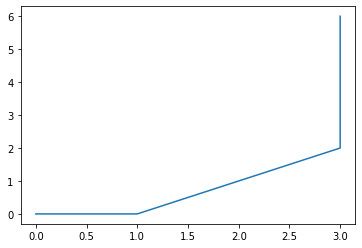

In [21]:
plt.plot(query, ref);

In [27]:
x_original = [0, 1, 2, 3] 
y_original = [1, 2, 3, 4, 5, 2, 1]

# Assuming that voice indicator function of x_original and y_original are:
x = [0, 1, 1, 1]          # speechq_f1
x2 = [1, 0, 0, 0]         # pauseq_f1

y = [1, 0, 0, 1, 1, 1, 0] # speechq_f2
y2 = [0, 1, 1, 0, 0, 0, 1] # pauseq_f2

dtw_classic, alignment = dtw(x, y, dist='square', method='classic', return_path=True) # alignment = alignment path

query = alignment[0]
ref = alignment[1] 

for i in range(len(alignment[0])):
    print('waring path coord: ', query[i], ref[i])
    print('Corresponded ', x[query[i]], y[ref[i]]) 
    # x original and y original correspond to the speech and pause indicator
    print('Speech and pause ', x[query[i]], y[ref[i]])    
    
print(stretch(alignment, speech_1, speech_2))    

waring path coord:  0 0
Corresponded  0 1
Speech and pause  0 1
waring path coord:  0 1
Corresponded  0 0
Speech and pause  0 0
waring path coord:  0 2
Corresponded  0 0
Speech and pause  0 0
waring path coord:  1 3
Corresponded  1 1
Speech and pause  1 1
waring path coord:  1 4
Corresponded  1 1
Speech and pause  1 1
waring path coord:  2 5
Corresponded  1 1
Speech and pause  1 1
waring path coord:  3 6
Corresponded  1 0
Speech and pause  1 0
(0.0, 0.33288787141322856, 0.2515621804533621, 0.5844500518665906)


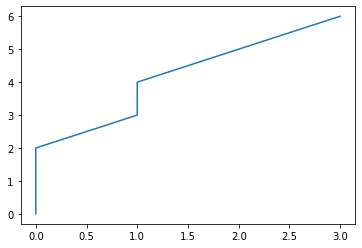

In [26]:
plt.plot(query, ref);

# Audio Processing

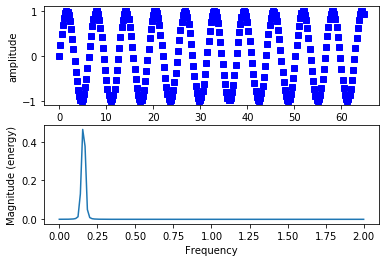

In [5]:
# Get time values of the signal
time   = np.arange(0, 65, .25);

# Get sample points for the discrete signal(which represents a continous signal)
signalAmplitude   = np.sin(time)

# plot the signal in time domain
plot.subplot(211)
plot.plot(time, signalAmplitude,'bs')
plot.xlabel('time')
plot.ylabel('amplitude')
# plot the signal in frequency domain

plot.subplot(212)

# sampling frequency = 4 - get a magnitude spectrum
plot.magnitude_spectrum(signalAmplitude,Fs=4)
plot.show()

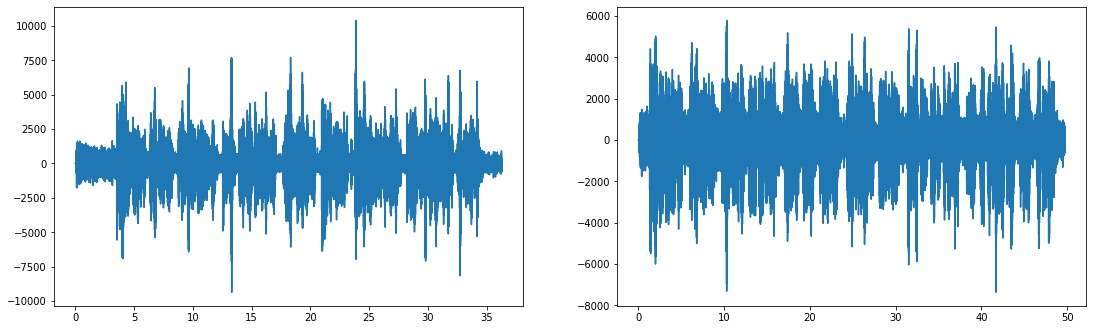

In [11]:
# Use 01 and 03.wav to test dtw

file1 = "/Users/ninismacbook/other_docs/Y4S1/capstone/py_converted/01.wav"
file2 = "/Users/ninismacbook/other_docs/Y4S1/capstone/py_converted/03.wav"

samplerate, query = wavfile.read(file1)
samplerate, ref = wavfile.read(file2)

length1 = query.shape[0] / samplerate
time1 = np.linspace(0., length1, query.shape[0])

length2 = ref.shape[0] / samplerate
time2 = np.linspace(0., length2, ref.shape[0])

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18.5, 5.5)
ax1.plot(time1, query)
ax2.plot(time2, ref);

[138 152 156 154 130 153 214 225 260 279 224 246 268 211 266 352 342 379
 406 360 340 293 257 316 352 362 413 433 419 388 348 352 353 342 415 503
 515 509 513 492 451 442 497 534 536 573 579 530 542 550 479 474 507 439
 406 497 569 596 629 647 639 591 554 623 687 655 640 644 597 574 609 623
 588 539 485 434 431 468 488 513 549 540 486 446 465 486 438 433 463 354
 240 254 267 286 281 199 195 166  28  66 176 140 154 187 152 202 226 198
 307 393 350 344 384 415 399 381 450 460 370 358 342 291 308 266 231 318
 283 186 217 152  22  43  51  41 115  94  34  80  68  29  80  86  71 119
 125 112 146 155 165 220 275 309 326 338 350 360 398 436 456 481 458 450
 519 534 551 634 626 642 744 731 739 792 706 702 797 754 743 750 617 554
 558 525 570 611 599 599 557 531 516 440 465 529 479 500 555 492 481 552
 595 629]
[573 572 570 567 566 564 561 559 556 553 551 549 548 549 551 552 554 558
 560 561 564 568 572 574 576 579 584 585 587 590 590 587 586 585 582 580
 577 574 573 572 569 565 561 554 549 547 

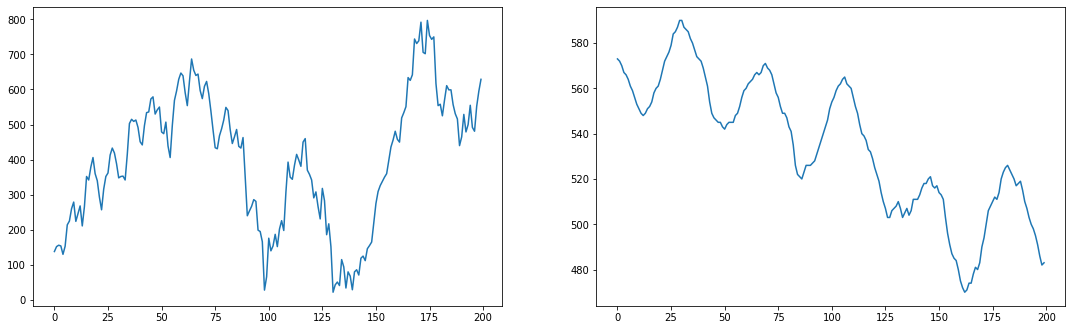

In [24]:
r1 = 3800
r2 = 4000
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18.5, 5.5)
ax1.plot(query[r1:r2])
print(query[r1:r2])
ax2.plot(ref[r1:r2]);
print(ref[r1:r2])

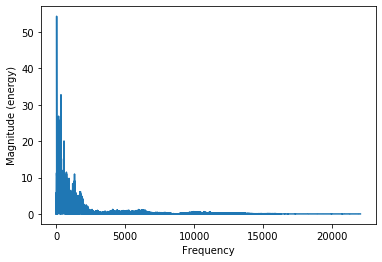

In [9]:
plot.magnitude_spectrum(query,Fs=44100);

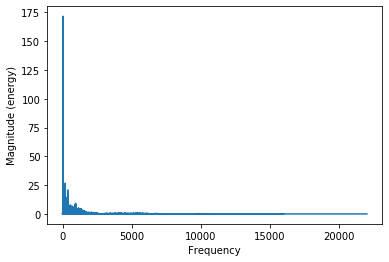

In [10]:
plot.magnitude_spectrum(ref,Fs=44100);